In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Import the datetime module from the datetime library
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | lac du bonnet
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | lata
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | himare
Processing Record 7 of Set 1 | sudak
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | vestmannaeyjar
Processing Record 11 of Set 1 | camacha
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | saint-joseph
Processing Record 14 of Set 1 | doume
Processing Record 15 of Set 1 | coxim
Processing Record 16 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 17 of Set 1 | hazorasp
Processing Record 18 of Set 1 | dingle
Processing Record 19 of Set 1 | biloela
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | san juan bautista
Processing Record 22 of Set 1 | egvekinot
Processing Record 23 of Set 1 | rikitea

Processing Record 38 of Set 4 | dekoa
City not found. Skipping...
Processing Record 39 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 40 of Set 4 | basoko
Processing Record 41 of Set 4 | aksarka
Processing Record 42 of Set 4 | kudahuvadhoo
Processing Record 43 of Set 4 | novikovo
Processing Record 44 of Set 4 | belen
Processing Record 45 of Set 4 | okato
Processing Record 46 of Set 4 | fatehpur
Processing Record 47 of Set 4 | vardo
Processing Record 48 of Set 4 | ostrovnoy
Processing Record 49 of Set 4 | hualmay
Processing Record 50 of Set 4 | ngunguru
Processing Record 1 of Set 5 | anito
Processing Record 2 of Set 5 | umm kaddadah
Processing Record 3 of Set 5 | nicoya
Processing Record 4 of Set 5 | castro
Processing Record 5 of Set 5 | saint anthony
Processing Record 6 of Set 5 | amla
Processing Record 7 of Set 5 | pundaguitan
Processing Record 8 of Set 5 | sorvag
City not found. Skipping...
Processing Record 9 of Set 5 | khorixas
Processing Record 10 of Set 5 

Processing Record 28 of Set 8 | eyl
Processing Record 29 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 30 of Set 8 | altay
Processing Record 31 of Set 8 | norrtalje
Processing Record 32 of Set 8 | rafsanjan
Processing Record 33 of Set 8 | severodvinsk
Processing Record 34 of Set 8 | waipawa
Processing Record 35 of Set 8 | lincoln
Processing Record 36 of Set 8 | ambon
Processing Record 37 of Set 8 | arawa
Processing Record 38 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 39 of Set 8 | biu
Processing Record 40 of Set 8 | tilzapotla
Processing Record 41 of Set 8 | carballo
Processing Record 42 of Set 8 | nichinan
Processing Record 43 of Set 8 | hofn
Processing Record 44 of Set 8 | luang prabang
Processing Record 45 of Set 8 | kikwit
Processing Record 46 of Set 8 | amderma
City not found. Skipping...
Processing Record 47 of Set 8 | hailun
Processing Record 48 of Set 8 | sola
Processing Record 49 of Set 8 | warrnambool
Processing Record 50 of 

Processing Record 16 of Set 12 | arlit
Processing Record 17 of Set 12 | union
Processing Record 18 of Set 12 | huehuetan
Processing Record 19 of Set 12 | prince rupert
Processing Record 20 of Set 12 | tiruttani
Processing Record 21 of Set 12 | pasighat
Processing Record 22 of Set 12 | caravelas
Processing Record 23 of Set 12 | maputo
Processing Record 24 of Set 12 | vao
Processing Record 25 of Set 12 | miles city
Processing Record 26 of Set 12 | verkh-usugli
Processing Record 27 of Set 12 | castlemaine
Processing Record 28 of Set 12 | serowe
Processing Record 29 of Set 12 | meteti
Processing Record 30 of Set 12 | tahta
Processing Record 31 of Set 12 | youkounkoun
Processing Record 32 of Set 12 | vila velha
Processing Record 33 of Set 12 | myitkyina
Processing Record 34 of Set 12 | warrington
Processing Record 35 of Set 12 | adjumani
Processing Record 36 of Set 12 | urusha
Processing Record 37 of Set 12 | dunedin
Processing Record 38 of Set 12 | mendahara
City not found. Skipping...
Pro

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.60,76,20,2.30,AR,2021-01-15 09:53:49
1,Lac Du Bonnet,50.2536,-96.0612,28.99,100,100,15.01,CA,2021-01-15 09:53:49
2,Esperance,-33.8667,121.9000,66.20,52,25,26.46,AU,2021-01-15 09:53:49
3,Lata,40.1629,-8.3327,46.99,100,90,1.14,PT,2021-01-15 09:53:50
4,Cidreira,-30.1811,-50.2056,74.10,83,68,17.56,BR,2021-01-15 09:52:48
5,Himare,40.1017,19.7447,52.00,50,0,2.30,AL,2021-01-15 09:53:50
6,Sudak,44.8500,34.9667,37.42,78,94,3.02,UA,2021-01-15 09:53:50
7,Puerto Ayora,-0.7393,-90.3518,72.00,95,76,1.01,EC,2021-01-15 09:53:50
8,Vestmannaeyjar,63.4427,-20.2734,42.80,81,75,23.02,IS,2021-01-15 09:53:51
9,Camacha,33.0833,-16.3333,57.20,58,40,11.50,PT,2021-01-15 09:53:02


In [11]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-01-15 09:53:49,-54.8000,-68.3000,44.60,76,20,2.30
1,Lac Du Bonnet,CA,2021-01-15 09:53:49,50.2536,-96.0612,28.99,100,100,15.01
2,Esperance,AU,2021-01-15 09:53:49,-33.8667,121.9000,66.20,52,25,26.46
3,Lata,PT,2021-01-15 09:53:50,40.1629,-8.3327,46.99,100,90,1.14
4,Cidreira,BR,2021-01-15 09:52:48,-30.1811,-50.2056,74.10,83,68,17.56


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

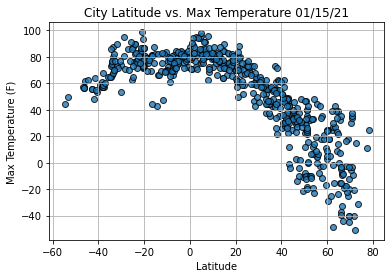

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

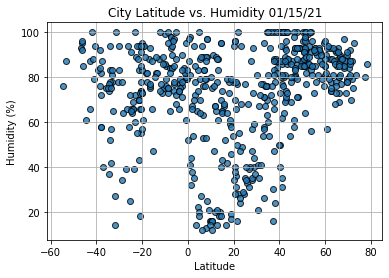

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

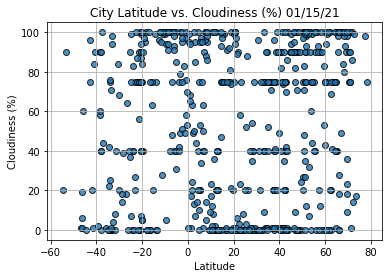

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

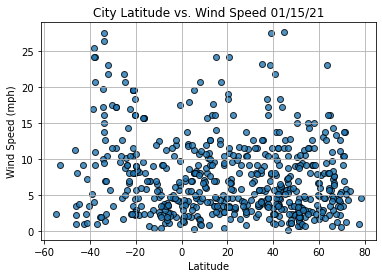

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [52]:
# Import SciPy
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(r_value)

In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Lac Du Bonnet,CA,2021-01-15 09:53:49,50.2536,-96.0612,28.99,100,100,15.01
3,Lata,PT,2021-01-15 09:53:50,40.1629,-8.3327,46.99,100,90,1.14
5,Himare,AL,2021-01-15 09:53:50,40.1017,19.7447,52.00,50,0,2.30
6,Sudak,UA,2021-01-15 09:53:50,44.8500,34.9667,37.42,78,94,3.02
8,Vestmannaeyjar,IS,2021-01-15 09:53:51,63.4427,-20.2734,42.80,81,75,23.02


In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] < 0)]

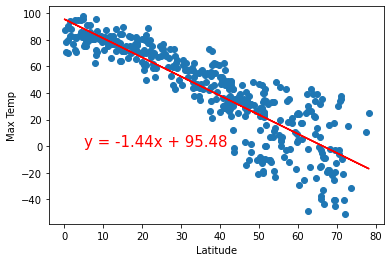

-0.8762059813580384


In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(5,0))

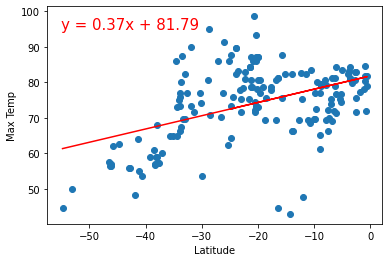

0.4581902374706351


In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,95))

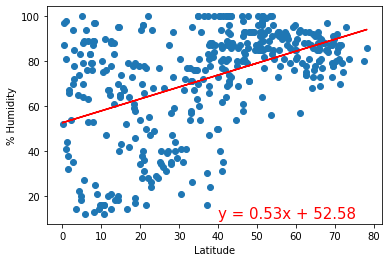

0.47211091293681207


In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

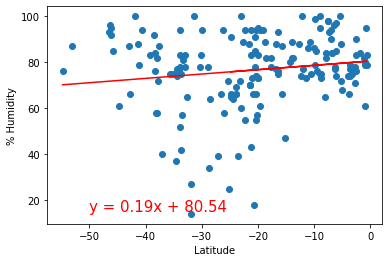

0.15080151448665383


In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

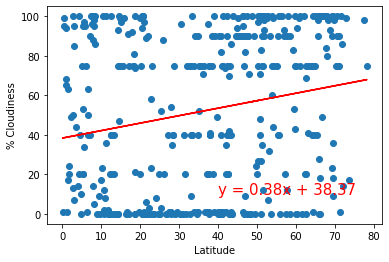

0.20083065110638787


In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

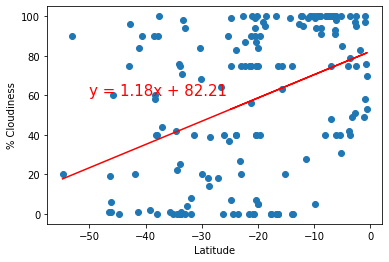

0.40560305288132653


In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


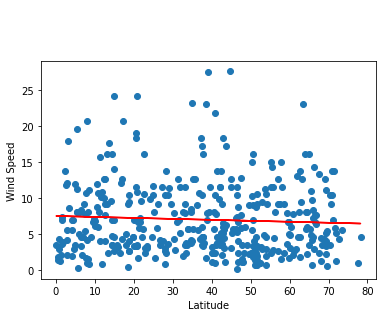

-0.05625515157576106


In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

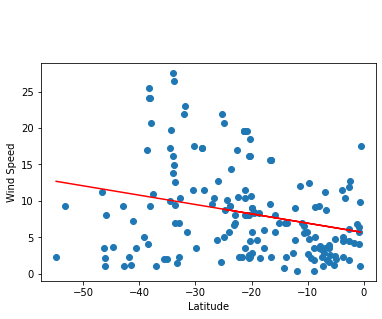

-0.26688687794069177


In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))